In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statistics as stat
from scipy import stats as st
import math
from scipy.stats import norm
from matplotlib.patches import Rectangle
from scipy.optimize import curve_fit

In [73]:
os.getcwd()
raw_data = open('kenet-datos.csv')
datak = np.loadtxt(raw_data, delimiter=",")
raw_data1 = open('lautaro-datos.csv')
datal = np.loadtxt(raw_data1, delimiter=",")
raw_data = open('martin-datos.csv')
datam = np.loadtxt(raw_data, delimiter=",")
raw_data = open('marcos-datos.csv')
datama = np.loadtxt(raw_data, delimiter=",")

In [37]:
media = np.mean(datak)
moda = st.mode(datak)
std = np.std(datak)
var = np.var(datak)
print("media: ",media)
print("moda: ",moda)

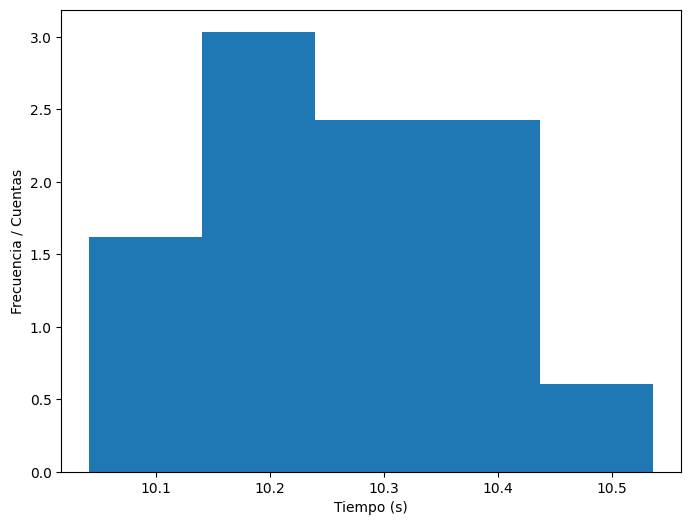

In [69]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(datak, bins = 5,density=True);
plt.xlabel('Tiempo (s)');
plt.ylabel('Frecuencia / Cuentas');

In [42]:
(mu, sigma) = norm.fit(datak)
# Estimacion de la media y sd de mis datos suponiendoq ue provienen de una normal
print('Media:', mu)
print('Desviación estándar:', sigma)

Media: 10.2672
Desviación estándar: 0.11103440908114935


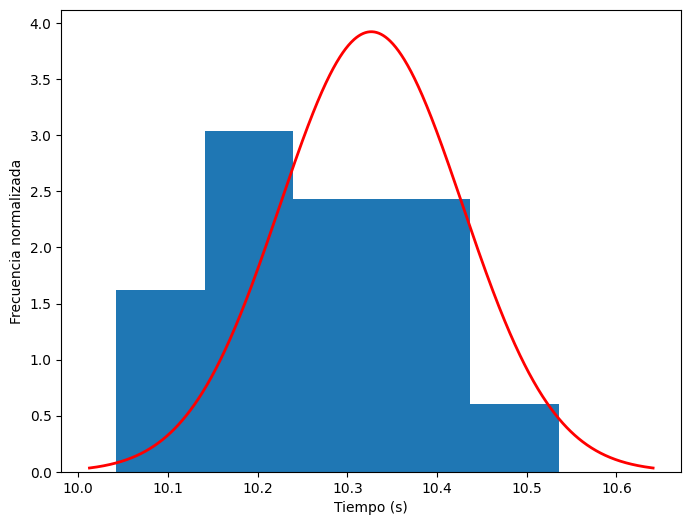

In [65]:
plt.figure(figsize=(8,6),dpi=100)

plt.hist(datak, bins=5, density=True,);

axis = np.linspace(norm.ppf(0.001,mu,sigma), norm.ppf(0.999,mu,sigma), 1000)
x_pdf = norm.pdf(axis,mu,sigma)
D = pd.concat([datak,datama,datal,datam],axis=1)
plt.plot(axis, x_pdf, 'r-', linewidth=2);
plt.xlabel('Tiempo (s)');
plt.ylabel('Frecuencia normalizada');

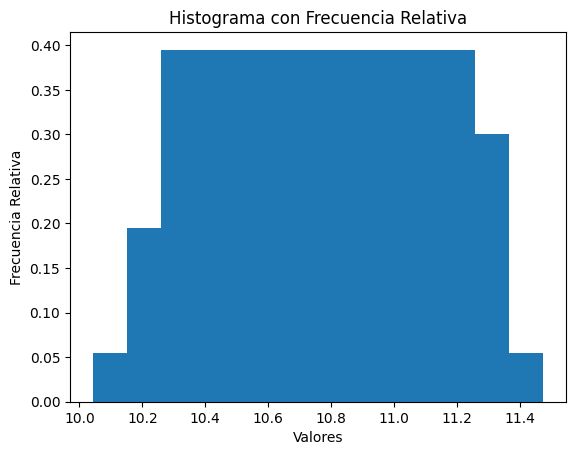

In [98]:
# Calcular la frecuencia relativa
frecuencia_absoluta, bordes = np.histogram(D, bins=5, density=False)
frecuencia_relativa = frecuencia_absoluta / 200

# Crear el gráfico de barras con frecuencia relativa
plt.bar(bordes[:-1], frecuencia_relativa, width=1.0, align='edge')

# Etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma con Frecuencia Relativa')

# Mostrar el gráfico
plt.show()

In [76]:
datak = pd.DataFrame(datak)
datam = pd.DataFrame(datam)
datama = pd.DataFrame(datama)
datal = pd.DataFrame(datal)

In [79]:
D = pd.concat([datak,datama,datal,datam],axis=0)

In [99]:
def gauss_function(x, a, media, sd):
    return a*np.exp(-(x-media)**2/(2*sd**2))

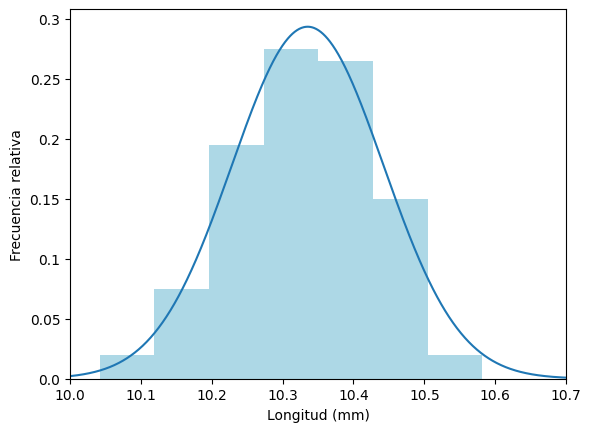

In [111]:
n_bins = 7
frecuencia,media_bines,z = plt.hist(D, bins = n_bins, color = "lightblue", density = False) #density = True es para utilizar la frecuencia relativa
plt.xlabel('Longitud (mm)')
plt.ylabel('Frecuencia relativa')

locs, _ = plt.yticks()


total = np.sum(frecuencia)
frec_rel = frecuencia/total
x = media_bines[:-1]+(media_bines[1]-media_bines[0])/2
#print(locs)
plt.yticks(locs,np.round(locs/len(D),3))
#plt.scatter(x, frecuencia, color = 'k')

sd = np.std(np.asarray(D))
media = np.mean(np.asarray(D))

popt, pcov = curve_fit(gauss_function, x, frecuencia, p0 = [1, media, sd])
x_new = np.linspace(10.0, 10.8, 1000)
plt.plot(x_new, gauss_function(x_new, *popt), label='fit')

plt.xlim(10.0, 10.7)
plt.show()
#print(frecuencia)
#print(media_bines)
#print(frec_rel)

Media: 10.32667
Desviación estándar: 0.10166602726574892


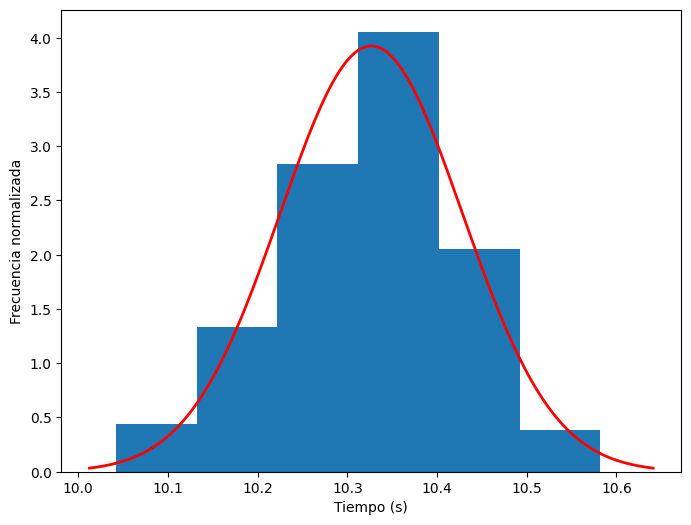

In [85]:
(mu, sigma) = norm.fit(D)
# Estimacion de la media y sd de mis datos suponiendoq ue provienen de una normal
print('Media:', mu)
print('Desviación estándar:', sigma)
plt.figure(figsize=(8,6),dpi=100)

plt.hist(D, bins=6, density=True);

axis = np.linspace(norm.ppf(0.001,mu,sigma), norm.ppf(0.999,mu,sigma), 1000)
x_pdf = norm.pdf(axis,mu,sigma)

plt.plot(axis, x_pdf, 'r-', linewidth=2);
plt.xlabel('Tiempo (s)');
plt.ylabel('Frecuencia normalizada');

In [113]:
#Superponiendo histogramas


n_bins = 10
plt.hist(martin, bins = n_bins, color = "yellow", density = False, label = 'martin', range = (10,10.6), alpha = 1)
plt.hist(kenet, bins = n_bins, color = "red", density = False, label = 'kenet', range = (10,10.6), alpha = 0.9)
plt.hist(lautaro, bins = n_bins, color = "green", density = False, label = 'lautaro', range = (10,10.6), alpha = 0.6)
plt.hist(marcos, bins = n_bins, color = "blue", density = False, label = 'marcos', range = (10,10.6), alpha = 0.5)
plt.legend(loc='upper right')
plt.xlabel('Longitud (cm)')
plt.ylabel('Cuentas')




NameError: name 'martin' is not defined